# Capstone Project

As the business problem has been discribed and the data has been explained, we will directly start with processing the dataset. 

## <font color = 'red'>Data Loading</font>

In [2]:
# import libraries

import numpy as np
import pandas as pd
import datetime
import seaborn as sns


In [3]:
# read the file

url = 'http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv'
df = pd.read_csv(url)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
# a general look of the dataset
df.head()

X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO     STATUS  \
0 -122.344896  47.717173         1    1003       1003  3503158    Matched   
1 -122.376467  47.543774         2   56200      56200  1795087    Matched   
2 -122.360735  47.701487         3  327037     328537  E979380    Matched   
3 -122.297415  47.599233         4  327278     328778  E996362  Unmatched   
4 -122.368001  47.653585         5    1248       1248  3645424  Unmatched   

       ADDRTYPE   INTKEY                                          LOCATION  \
0         Block      NaN    AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST   
1         Block      NaN  35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST   
2  Intersection  37122.0                        3RD AVE NW AND NW 100TH ST   
3  Intersection  30602.0                M L KING JR WAY S AND S JACKSON ST   
4         Block      NaN       W EWING ST BETWEEN 6TH AVE W AND W EWING PL   

   ... ROADCOND                LIGHTCOND PEDROWNOTGRNT SDOTCOLNUM SPEEDING  \
0  ...      Dry                 Daylight             Y        NaN      NaN   
1  ...      Dry  Dark - Street Lights On           NaN  6015003.0      NaN   
2  ...      Wet                 Daylight           NaN        NaN      NaN   
3  ...      NaN                      NaN           NaN        NaN      NaN   
4  ...      NaN                      NaN           NaN        NaN      NaN   

   ST_COLCODE                              ST_COLDESC  SEGLANEKEY  \
0          45                  Vehicle - Pedalcyclist       15057   
1           0  Vehicle going straight hits pedestrian           0   
2          10                       Entering at angle           0   
3                                                 NaN           0   
4                                                 NaN           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  
1             0             N  
2             0             N  
3             0             N  
4             0             N  

[5 rows x 40 columns]

In [10]:
# dataset's shape
df.shape

(221525, 40)

In [23]:
# dataset's columns
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

## <font color = 'red'>Data Cleaning</font>

In [4]:
# only keep columns that will be useful in the prediction
features = df[['X', 'Y', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'INCDATE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND','LIGHTCOND', 'HITPARKEDCAR']]


In [5]:
# narrow down the df by limiting its timeframe
features['DATE'] = pd.to_datetime(features['INCDATE'])
features['DATE'] = features['DATE'].dt.date

# choose data starts from 2010
X = features[(features['DATE'] > datetime.date(2010,1,1))]
X.drop(['INCDATE'], axis = 1, inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [6]:
X.shape

(131716, 17)

In [7]:
# check if df_use contains any null data in the rows
X.isnull().sum()

X                 4503
Y                 4503
ADDRTYPE          2634
LOCATION          3053
SEVERITYCODE         1
COLLISIONTYPE    20071
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INJURIES             0
JUNCTIONTYPE     10470
WEATHER          20251
ROADCOND         20164
LIGHTCOND        20338
HITPARKEDCAR         0
DATE                 0
dtype: int64

In [6]:
# Check if the dataset is balanced if we simply drop all rows with NaN values
df_1 = X.dropna(inplace = False)
df_1.shape

(104571, 17)

In [12]:
df_1.groupby(['SEVERITYCODE']).size()

SEVERITYCODE
0         2
1     69325
2     33408
2b     1654
3       182
dtype: int64

As we count the size of data for each severity code, we noticed that the data is heavily imbalanced, as most of data are labeled with '1', '2'. We should make sure data should be equally distributed in each catergory. 

Since '0' severity code only contains 2 data, it means simply drop all NaN values is not efficient. We should go back to the original dataset and find more rows with same label which we removed earlier. 

#### Data Wrangling

In [7]:
df_0 = X[(X.SEVERITYCODE) == '0']
df_0.shape

(15375, 17)

In [44]:
df_0.isnull().sum()

X                 1487
Y                 1487
ADDRTYPE          1353
LOCATION          1415
SEVERITYCODE         0
COLLISIONTYPE    15373
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INJURIES             0
JUNCTIONTYPE      5198
WEATHER          15373
ROADCOND         15373
LIGHTCOND        15373
HITPARKEDCAR         0
DATE                 0
dtype: int64

In [8]:
df_0.dropna(thresh=13, axis = 0, inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_0.isnull().sum()

X                   0
Y                   0
ADDRTYPE            0
LOCATION            0
SEVERITYCODE        0
COLLISIONTYPE    9969
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
INJURIES            0
JUNCTIONTYPE        0
WEATHER          9969
ROADCOND         9969
LIGHTCOND        9969
HITPARKEDCAR        0
DATE                0
dtype: int64

In [50]:
df_0.shape

(9971, 17)

Since Majority catagorical values are missing, there's no way to generate those missing values. So later in prediction, we cannot use those features.

In [9]:
df_1 = X[(X.SEVERITYCODE) == '1']
df_1.shape

(79231, 17)

In [13]:
df_1.isnull().sum()

X                2426
Y                2426
ADDRTYPE         1176
LOCATION         1488
SEVERITYCODE        0
COLLISIONTYPE    3720
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
INJURIES            0
JUNCTIONTYPE     4945
WEATHER          3854
ROADCOND         3800
LIGHTCOND        3934
HITPARKEDCAR        0
DATE                0
dtype: int64

In [10]:
df_1.dropna(inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_1.shape

(69325, 17)

Collissions with severity code 1 has way more complete samples, therefore all features are good, so we can just randomly select enough rows for future analyzing. 

In [11]:
df_2 = X[(X.SEVERITYCODE) == '2']
df_2.shape

(35163, 17)

In [17]:
df_2.isnull().sum()

X                561
Y                561
ADDRTYPE         103
LOCATION         147
SEVERITYCODE       0
COLLISIONTYPE    926
PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
VEHCOUNT           0
INJURIES           0
JUNCTIONTYPE     308
WEATHER          966
ROADCOND         938
LIGHTCOND        973
HITPARKEDCAR       0
DATE               0
dtype: int64

In [12]:
df_2.dropna(inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_2.shape

(33408, 17)

Collissions with severity code 2 has way more complete samples, therefore all features are good, so we can just randomly select enough rows for future analyzing. 

In [13]:
df_2b = X[(X.SEVERITYCODE) == '2b']
df_2b.shape

(1746, 17)

In [21]:
df_2b.isnull().sum()

X                22
Y                22
ADDRTYPE          2
LOCATION          3
SEVERITYCODE      0
COLLISIONTYPE    41
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INJURIES          0
JUNCTIONTYPE     18
WEATHER          48
ROADCOND         43
LIGHTCOND        48
HITPARKEDCAR      0
DATE              0
dtype: int64

In [14]:
df_2b.dropna(inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_2b.shape

(1654, 17)

Collissions with severity code 2b also has quite enough samples, therefore we will use all rows for future analyzing. 

In [15]:
df_3 = X[(X.SEVERITYCODE) == '3']
df_3.shape

(200, 17)

In [25]:
df_3.isnull().sum()

X                 7
Y                 7
ADDRTYPE          0
LOCATION          0
SEVERITYCODE      0
COLLISIONTYPE    10
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INJURIES          0
JUNCTIONTYPE      1
WEATHER          10
ROADCOND         10
LIGHTCOND        10
HITPARKEDCAR      0
DATE              0
dtype: int64

In [16]:
xt = df_3['X'].value_counts().idxmax()
yt = df_3['Y'].value_counts().idxmax()
#replace the missing 'coordinate' values by the most frequent 
df_3["X"].replace(np.nan, xt, inplace=True)
df_3["Y"].replace(np.nan, yt, inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [27]:
df_3['COLLISIONTYPE'].value_counts() 

Pedestrian    79
Other         48
Cycles        15
Angles        14
Head On       10
Left Turn      9
Rear Ended     6
Sideswipe      5
Parked Car     3
Right Turn     1
Name: COLLISIONTYPE, dtype: int64

In [222]:
df_3['COLLISIONTYPE'].value_counts().idxmax()

'Pedestrian'

In [17]:
#replace the missing 'COLLISIONTYPE' values by the most frequent 
df_3["COLLISIONTYPE"].replace(np.nan, "Pedestrian", inplace=True)

In [224]:
df_3['JUNCTIONTYPE'].value_counts() 

At Intersection (intersection related)               91
Mid-Block (not related to intersection)              89
Mid-Block (but intersection related)                 11
Driveway Junction                                     6
At Intersection (but not related to intersection)     2
Name: JUNCTIONTYPE, dtype: int64

In [225]:
df_3[df_3['JUNCTIONTYPE'].isnull()]

X          Y ADDRTYPE  \
215441 -122.34452  47.690198    Block   

                                            LOCATION SEVERITYCODE  \
215441  AURORA AVE N BETWEEN N 84TH ST AND N 85TH ST            3   

       COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  \
215441    Pedestrian            2         1            0         1         0   

       JUNCTIONTYPE WEATHER ROADCOND                LIGHTCOND HITPARKEDCAR  \
215441          NaN   Clear      Dry  Dark - Street Lights On            N   

                     INCDTTM        DATE  
215441  8/13/2019 9:20:00 PM  2019-08-13

In [18]:
# by looking at its address type and location, we replace the miising value by
df_3["JUNCTIONTYPE"].replace(np.nan, "Mid-Block (not related to intersection)", inplace=True)

In [227]:
df_3['WEATHER'].value_counts() 

Clear               125
Overcast             33
Raining              27
Fog/Smog/Smoke        2
Partly Cloudy         1
Severe Crosswind      1
Other                 1
Name: WEATHER, dtype: int64

In [228]:
df_3['ROADCOND'].value_counts() 

Dry        150
Wet         39
Unknown      1
Name: ROADCOND, dtype: int64

In [229]:
df_3['LIGHTCOND'].value_counts() 

Daylight                    90
Dark - Street Lights On     84
Dusk                         7
Dawn                         4
Dark - Street Lights Off     3
Unknown                      1
Dark - No Street Lights      1
Name: LIGHTCOND, dtype: int64

In [230]:
df_3['WEATHER'].value_counts().idxmax()

'Clear'

In [231]:
df_3['ROADCOND'].value_counts().idxmax()

'Dry'

In [232]:
df_3[df_3['WEATHER'].isnull()]

X          Y      ADDRTYPE  \
147290 -122.341785  47.571561         Block   
168357 -122.311597  47.578626  Intersection   
172789 -122.331629  47.579813         Block   
175043 -122.314929  47.601690  Intersection   
201602 -122.344484  47.682772  Intersection   
213214 -122.283702  47.542453  Intersection   
213463 -122.317481  47.549829         Block   
219154 -122.293519  47.618246         Block   
219665 -122.296494  47.576185         Block   
220114 -122.341828  47.690542  Intersection   

                                                 LOCATION SEVERITYCODE  \
147290  WEST SEATTLE BR WB BETWEEN WSB-WB SPOK-NR RP A...            3   
168357                    BEACON AVE S AND S MCCLELLAN ST            3   
172789  S LANDER ST BETWEEN OCCIDENTAL AVE S AND 3RD A...            3   
175043                          13TH AVE AND E YESLER WAY            3   
201602                      AURORA AVE N AND WINONA AVE N            3   
213214                M L KING JR ER WAY S AND S HOLLY ST            3   
213463  AIRPORT WAY S BETWEEN S DORIS ST AND S NEBRASK...            3   
219154       30TH AVE BETWEEN E HOWELL ST AND E DENNY WAY            3   
219665  RAINIER AVE S BETWEEN M L KING JR WAY S AND S ...            3   
220114                        STONE AVE N AND N 85TH W ST            3   

       COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  \
147290    Pedestrian            2         0            0         0         0   
168357    Pedestrian            3         0            0         0         0   
172789    Pedestrian            2         0            0         0         0   
175043    Pedestrian            3         0            0         0         1   
201602    Pedestrian            3         0            0         0         1   
213214    Pedestrian            6         0            0         0         2   
213463    Pedestrian            4         0            0         0         0   
219154    Pedestrian            5         0            0         0         2   
219665    Pedestrian            3         0            0         0         0   
220114    Pedestrian            2         0            0         0         0   

                                             JUNCTIONTYPE WEATHER ROADCOND  \
147290            Mid-Block (not related to intersection)     NaN      NaN   
168357             At Intersection (intersection related)     NaN      NaN   
172789               Mid-Block (but intersection related)     NaN      NaN   
175043  At Intersection (but not related to intersection)     NaN      NaN   
201602             At Intersection (intersection related)     NaN      NaN   
213214             At Intersection (intersection related)     NaN      NaN   
213463            Mid-Block (not related to intersection)     NaN      NaN   
219154            Mid-Block (not related to intersection)     NaN      NaN   
219665            Mid-Block (not related to intersection)     NaN      NaN   
220114             At Intersection (intersection related)     NaN      NaN   

       LIGHTCOND HITPARKEDCAR     INCDTTM        DATE  
147290       NaN            N    9/8/2012  2012-09-08  
168357       NaN            N    1/5/2016  2016-01-05  
172789       NaN            N   4/30/2016  2016-04-30  
175043       NaN            N   5/13/2016  2016-05-13  
201602       NaN            N   9/30/2018  2018-09-30  
213214       NaN            N   9/11/2020  2020-09-11  
213463       NaN            Y   8/29/2020  2020-08-29  
219154       NaN            N   7/26/2020  2020-07-26  
219665       NaN            N  10/20/2019  2019-10-20  
220114       NaN            N  10/29/2019  2019-10-29

In [19]:
#replace the missing 'WEATHER' values by the most frequent 
df_3["WEATHER"].replace(np.nan, "Clear", inplace=True)

In [20]:
#replace the missing 'ROADCOND' values by the most frequent 
df_3["ROADCOND"].replace(np.nan, "Dry", inplace=True)

In [25]:
df_3.groupby(['LIGHTCOND', 'PERSONCOUNT'])['LIGHTCOND'].count()

LIGHTCOND                 PERSONCOUNT
Dark - No Street Lights   3               1
Dark - Street Lights Off  1               1
                          2               2
Dark - Street Lights On   1              17
                          2              42
                          3              11
                          4               9
                          5               1
                          6               1
                          7               1
                          9               1
                          12              1
Dawn                      2               3
                          3               1
Daylight                  0               1
                          1               8
                          2              59
                          3               7
                          4               4
                          5               5
                          6               1
                          8           

In [21]:
#replace the missing 'LIGHTCOND' values by the TWO most frequent 
df_3.loc[(df_3['LIGHTCOND'].isnull()) & (df_3['PERSONCOUNT'] > 5), 'LIGHTCOND']='Daylight'
df_3.loc[(df_3['LIGHTCOND'].isnull()) & (df_3['PERSONCOUNT'] <= 5), 'LIGHTCOND']='Dark - Street Lights On'

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [33]:
df_3.shape

(200, 17)

In [86]:
df_use0 = df_0.sample(n=1700, random_state=40)
df_use1 = df_1.sample(n=1700, random_state=40)
df_use2 = df_2.sample(n=1700, random_state=40)

df_balanced = pd.concat([df_use0, df_use1, df_use2, df_2b, df_3])
df_balanced.shape

(6954, 17)

In [242]:
# dataset's types
df_balanced.dtypes

X                float64
Y                float64
ADDRTYPE          object
LOCATION          object
SEVERITYCODE      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INJURIES           int64
JUNCTIONTYPE      object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
HITPARKEDCAR      object
DATE              object
dtype: object

In [244]:
# describe the use dataset
df_balanced.describe()

X             Y   PERSONCOUNT      PEDCOUNT   PEDCYLCOUNT  \
count  15225.000000  15225.000000  15225.000000  15225.000000  15225.000000   
mean    -122.332464     47.624401      1.122365      0.060361      0.028112   
std        0.030391      0.054253      1.664027      0.262562      0.166879   
min     -122.419032     47.496251      0.000000      0.000000      0.000000   
25%     -122.352598     47.586175      0.000000      0.000000      0.000000   
50%     -122.331676     47.619903      0.000000      0.000000      0.000000   
75%     -122.312736     47.666441      2.000000      0.000000      0.000000   
max     -122.241995     47.734137     93.000000      5.000000      2.000000   

           VEHCOUNT      INJURIES  
count  15225.000000  15225.000000  
mean       0.621084      0.310739  
std        0.963163      0.940243  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        1.000000      0.000000  
max       15.000000     78.000000

In [243]:
# describe the use dataset
df_balanced.describe(include = 'all')

X             Y ADDRTYPE  \
count   15225.000000  15225.000000    15225   
unique           NaN           NaN        2   
top              NaN           NaN    Block   
freq             NaN           NaN    10293   
mean     -122.332464     47.624401      NaN   
std         0.030391      0.054253      NaN   
min      -122.419032     47.496251      NaN   
25%      -122.352598     47.586175      NaN   
50%      -122.331676     47.619903      NaN   
75%      -122.312736     47.666441      NaN   
max      -122.241995     47.734137      NaN   

                                              LOCATION SEVERITYCODE  \
count                                            15225        15225   
unique                                            8750            5   
top     AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST            0   
freq                                                21         9971   
mean                                               NaN          NaN   
std                                                NaN          NaN   
min                                                NaN          NaN   
25%                                                NaN          NaN   
50%                                                NaN          NaN   
75%                                                NaN          NaN   
max                                                NaN          NaN   

       COLLISIONTYPE   PERSONCOUNT      PEDCOUNT   PEDCYLCOUNT      VEHCOUNT  \
count           5256  15225.000000  15225.000000  15225.000000  15225.000000   
unique            10           NaN           NaN           NaN           NaN   
top           Angles           NaN           NaN           NaN           NaN   
freq             940           NaN           NaN           NaN           NaN   
mean             NaN      1.122365      0.060361      0.028112      0.621084   
std              NaN      1.664027      0.262562      0.166879      0.963163   
min              NaN      0.000000      0.000000      0.000000      0.000000   
25%              NaN      0.000000      0.000000      0.000000      0.000000   
50%              NaN      0.000000      0.000000      0.000000      0.000000   
75%              NaN      2.000000      0.000000      0.000000      1.000000   
max              NaN     93.000000      5.000000      2.000000     15.000000   

            INJURIES                             JUNCTIONTYPE WEATHER  \
count   15225.000000                                    15225    5256   
unique           NaN                                        7      10   
top              NaN  Mid-Block (not related to intersection)   Clear   
freq             NaN                                     9224    3323   
mean        0.310739                                      NaN     NaN   
std         0.940243                                      NaN     NaN   
min         0.000000                                      NaN     NaN   
25%         0.000000                                      NaN     NaN   
50%         0.000000                                      NaN     NaN   
75%         0.000000                                      NaN     NaN   
max        78.000000                                      NaN     NaN   

       ROADCOND LIGHTCOND HITPARKEDCAR        DATE  
count      5256      5256        15225       15225  
unique        8         9            2        3736  
top         Dry  Daylight            N  2013-05-01  
freq       3697      3226        12475          17  
mean        NaN       NaN          NaN         NaN  
std         NaN       NaN          NaN         NaN  
min         NaN       NaN          NaN         NaN  
25%         NaN       NaN          NaN         NaN  
50%         NaN       NaN          NaN         NaN  
75%         NaN       NaN          NaN         NaN  
max         NaN       NaN          NaN         NaN

## <font color = 'red'>Data Visulizing</font>

Visualize the dataset from different perspective to get the general idea about its distribution

#### Car collision severity vs coordinate

In [33]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    attrs-20.2.0               |     pyh9f0ad1d_0          41 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1007         187 KB  conda-forge
    cryptography-3.1           |   py36h45558ae

In [37]:
# display the map of Seattle
latitude = 47.608013
longitude = -122.335167
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)
#seattle_map

In [39]:
# Add collisions on the map and mark its severity
from folium import plugins

incidents = plugins.MarkerCluster().add_to(seattle_map)

# Label only 3,000 data
df_map = df_balanced.sample(n = 3000)
for lat, lng, label, in zip(df_map.Y, df_map.X, df_map.SEVERITYCODE):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label,
    ).add_to(incidents)
    
seattle_map

As we zoom in the map, certain locations would have multiple car collisions and majority collisions happened in that location have same severity. 
Hence we know the location is important to predict the severity of a collision. 

#### Car collision severity vs address and junction type

In [36]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.0


In [2]:
!conda install -c anaconda pandas-profiling --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [42]:
df_balanced['JUNCTIONTYPE'].unique()

array(['Mid-Block (not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'At Intersection (but not related to intersection)',
       'Ramp Junction', 'Unknown'], dtype=object)

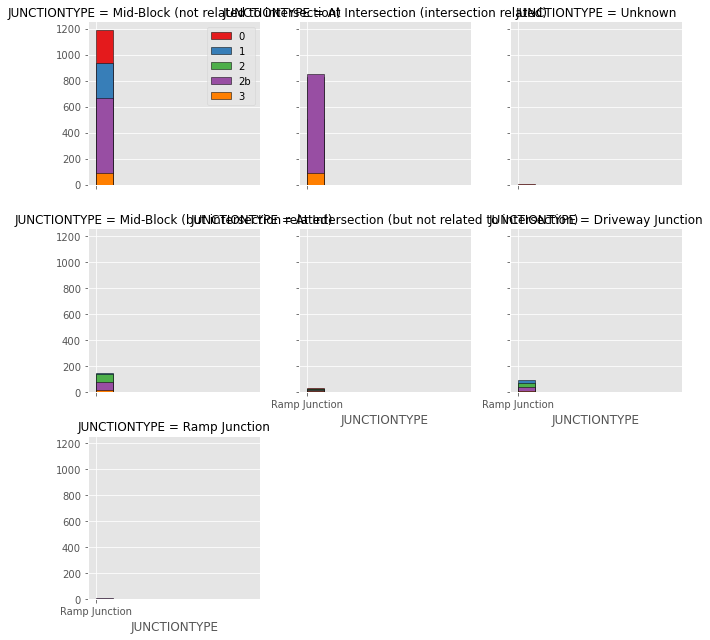

In [44]:
bins = np.linspace(df_balanced.PERSONCOUNT.min(), 10, 10)
g = sns.FacetGrid(df_balanced, col="JUNCTIONTYPE", hue="SEVERITYCODE", palette="Set1", col_wrap=3)
g.map(plt.hist, 'JUNCTIONTYPE', bins=bins, ec="k")

g.axes[0].legend()
plt.show()

As the plot shown above, collisions with **severitycode 1** are more likely to happen on **Mid-Block (not related to intersection)** and **at Intersection (intersection related)**. Collisions with **severitycode 2** are also more likely to happen on those two junction types.

#### Car collision severity vs Weather, Road condition, Light condition

In [ ]:
!conda install -c anaconda seaborn -y

In [72]:
df_balanced['WEATHER'].value_counts()

Clear                       3320
Raining                      938
Overcast                     791
Unknown                      148
Snowing                       19
Fog/Smog/Smoke                15
Other                         14
Sleet/Hail/Freezing Rain       5
Severe Crosswind               3
Partly Cloudy                  1
Blowing Sand/Dirt              1
Name: WEATHER, dtype: int64

In [75]:
df_weather = df_balanced[(df_balanced['WEATHER'].isin(['Clear', 'Raining', 'Overcast', 'Snowing']))]

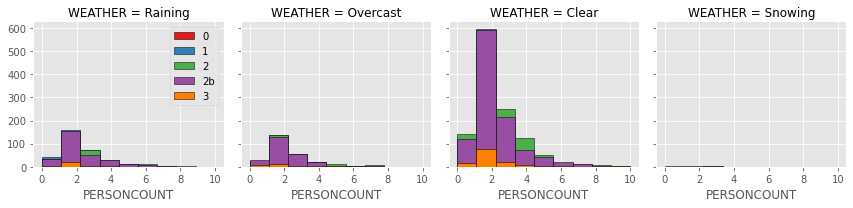

In [78]:
import seaborn as sns

bins = np.linspace(df_weather.PERSONCOUNT.min(), 10, 10)
g = sns.FacetGrid(df_weather, col="WEATHER", hue="SEVERITYCODE", palette="Set1", col_wrap=4)
g.map(plt.hist, 'PERSONCOUNT', bins=bins, ec="k")

g.axes[0].legend()
plt.show()


As the graph shown above, when weather is clear would cause more sever collissions on the contrast, and thus more person involved. 

In [45]:
df_balanced['ROADCOND'].value_counts()

Dry               3691
Wet               1358
Unknown            156
Ice                 23
Snow/Slush          18
Other                4
Standing Water       3
Sand/Mud/Dirt        2
Name: ROADCOND, dtype: int64

In [80]:
df_road = df_balanced[(df_balanced['ROADCOND'].isin(['Dry', 'Wet', 'Ice', 'Snow/Slush']))]

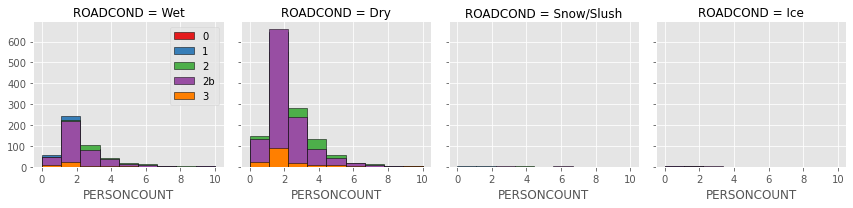

In [81]:
bins = np.linspace(df_road.PERSONCOUNT.min(), 10, 10)
g = sns.FacetGrid(df_road, col="ROADCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=4)
g.map(plt.hist, 'PERSONCOUNT', bins=bins, ec="k")

g.axes[0].legend()
plt.show()


As the graph shown above, when road condition is dry would cause more sever collissions with more people involved on the contrast. 

In [83]:
df_balanced['LIGHTCOND'].value_counts()

Daylight                    3245
Dark - Street Lights On     1507
Dusk                         191
Unknown                      149
Dawn                          86
Dark - No Street Lights       38
Dark - Street Lights Off      37
Other                          2
Name: LIGHTCOND, dtype: int64

In [84]:
df_light = df_balanced[(df_balanced['LIGHTCOND'].isin(['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn']))]

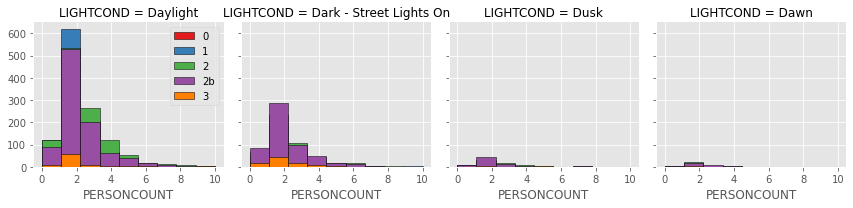

In [85]:
bins = np.linspace(df_light.PERSONCOUNT.min(), 10, 10)
g = sns.FacetGrid(df_light, col="LIGHTCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=4)
g.map(plt.hist, 'PERSONCOUNT', bins=bins, ec="k")

g.axes[0].legend()
plt.show()


As the graph shown above, daylight causes more sever collissions with more people involved on the contrast. 

#### Car collision severity vs number of parked cars hit

In [86]:
df_balanced['HITPARKEDCAR'].unique()

array(['Y', 'N'], dtype=object)

In [48]:
df_hit = df_balanced.groupby(['HITPARKEDCAR', 'SEVERITYCODE'])['HITPARKEDCAR'].count().reset_index(name='COUNT')
df_hit

HITPARKEDCAR SEVERITYCODE  COUNT
0            N            0   1275
1            N            1   1563
2            N            2   1687
3            N           2b   1634
4            N            3    199
5            Y            0    425
6            Y            1    137
7            Y            2     13
8            Y           2b     20
9            Y            3      1

In [ ]:
df_balanced['HITPARKEDCAR'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)

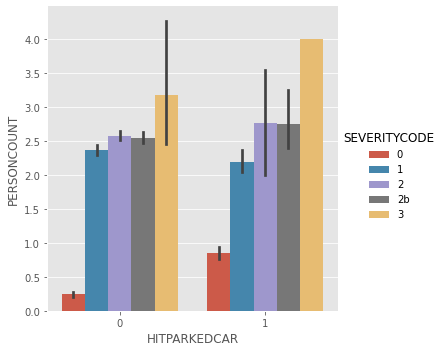

In [59]:
sns.catplot(x="HITPARKEDCAR", y="PERSONCOUNT", hue="SEVERITYCODE", kind="bar", data=df_balanced)

Either parked car(s) are hit or not, is not a key determinal feature in predicting the severity of a collission.

## <font color = 'red'>Model Building</font>

In [64]:
conda install -c glemaitre imbalanced-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          46 KB
    ca-certificates-2020.7.22  |                0         125 KB
    certifi-2020.6.20          |           py36_0         156 KB
    imbalanced-learn-0.2.1     |           py36_0         117 KB  glemaitre
    joblib-0.16.0              |             py_0         210 KB
    scikit-learn-0.23.2        |   py36h0573a6f_0         5.0 MB
    scipy-1.5.2                |   py36habc2bb6_0        14.3 MB
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0   

In [154]:
df_balanced.columns

Index(['X', 'Y', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR',
       'DATE'],
      dtype='object')

In [155]:
df_balanced.dtypes

X                float64
Y                float64
ADDRTYPE          object
LOCATION          object
SEVERITYCODE      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INJURIES           int64
JUNCTIONTYPE      object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
HITPARKEDCAR      object
DATE              object
dtype: object

### Using Numerical Features

We first build different models with numerical and binary features, then select the best one among them. 

In [156]:
# Seperate the independent and dependent features
X = df_balanced[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'HITPARKEDCAR']]
X['HITPARKEDCAR'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
Y = df_balanced[['SEVERITYCODE']]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [157]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [158]:
#Split dataset to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (5910, 6) (5910, 1)
Test set: (1044, 6) (1044, 1)


In [159]:
# over-sampling minority group
import imblearn
from imblearn.over_sampling import SMOTE

OS = SMOTE(random_state=12, ratio = 1.0)
X_train_res, Y_train_res = OS.fit_sample(X_train, Y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [163]:
print(X_train_res.shape, Y_train_res.shape)

(7202, 6) (7202,)


### KNN

In [93]:
# Import KNN libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [166]:
# Train the model with different Ks 

Ks = 20
mean_acc_train = np.zeros((Ks-1))
mean_acc_test = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X_train_res,Y_train_res)
    yhat_train = KNN.predict(X_train_res)
    yhat_test = KNN.predict(X_test)
    mean_acc_train[n-1] = metrics.accuracy_score(Y_train_res, yhat_train)
    mean_acc_test[n-1] = metrics.accuracy_score(Y_test, yhat_test)

print(mean_acc_train) 
print(mean_acc_test)

[0.74715 0.77048 0.77284 0.76951 0.78923 0.77381 0.78964 0.77937 0.78284
 0.78187 0.78006 0.77145 0.77895 0.77076 0.77117 0.76965 0.76784 0.76812
 0.77631]
[0.74234 0.79981 0.79502 0.79215 0.78352 0.78736 0.79981 0.80268 0.81897
 0.81897 0.81801 0.81322 0.81705 0.81513 0.81801 0.81897 0.82184 0.81992
 0.82184]


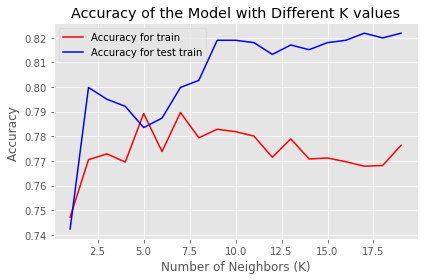

In [167]:
# Choose the best K

plt.plot(range(1,Ks),mean_acc_train,'r')
plt.plot(range(1,Ks),mean_acc_test,'b')

plt.title("Accuracy of the Model with Different K values")
plt.legend(('Accuracy for train', 'Accuracy for test train'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [168]:
print("The best accuracy was with", mean_acc_test.max(), "with k=", mean_acc_test.argmax()+1)

The best accuracy was with 0.8218390804597702 with k= 17


In [169]:
# Rebuild the model with the best K previously found
model_KNN = KNeighborsClassifier(n_neighbors = 17).fit(X_train_res,Y_train_res)

### Decision Tree

In [101]:
# Import Decision Tree libraries
from sklearn.tree import DecisionTreeClassifier

In [170]:
# Build the model with different depths

Ks = 8
mean_acc_test = np.zeros((Ks-1))

for d in range(3,Ks):
    
    #Train Model and Predict  
    severityTree = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    severityTree.fit(X_train_res, Y_train_res)
    predTree = severityTree.predict(X_test)
    mean_acc_test[d-1] = metrics.accuracy_score(Y_test, predTree)

print(mean_acc_test)

[0.      0.      0.80843 0.81226 0.80172 0.81609 0.81897]


In [171]:
# Choose the best depth without overfitting
print("The best accuracy was with", mean_acc_test.max(), "with depth=", mean_acc_test.argmax()+1)

The best accuracy was with 0.8189655172413793 with depth= 7


In [172]:
# Rebuild the model
model_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
model_Tree.fit(X_train_res, Y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

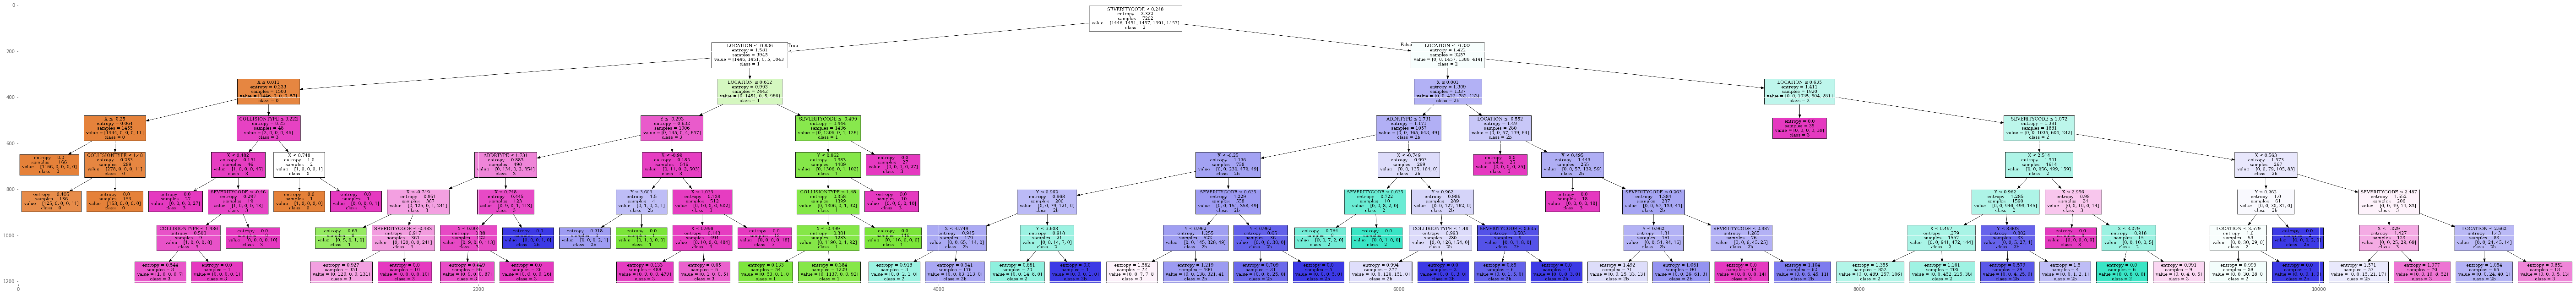

In [174]:
# Draw the model

from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
import matplotlib.image as mpimg

dot_data = StringIO()
filename = "severitytree.png"
featureNames = df_balanced.columns[0:6]
targetNames = df_balanced["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(model_Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(Y_train_res), filled=True, special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 400))
plt.imshow(img,interpolation='nearest')

### Suporter Vector Machine

In [175]:
# Build the SVM model
from sklearn import svm

model_SVM = svm.SVC(kernel='rbf')
model_SVM.fit(X_train_res, Y_train_res)
yhat_test = model_SVM.predict(X_test)

Confusion matrix, without normalization
[[254   0   0   0   0]
 [  0 235   0   0  14]
 [  0   1 167  71   4]
 [  0   0  87 173   3]
 [  0   4   4   2  25]]


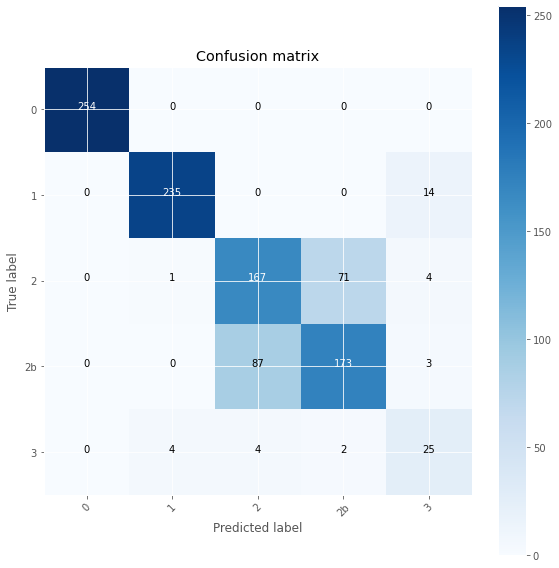

In [176]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, yhat_test, labels=['0','1', '2', '2b', '3'])
np.set_printoptions(precision=5)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=['0','1', '2', '2b', '3'], normalize= False,  title='Confusion matrix')


### Logistic Regression

In [177]:
# Build the model for Logistic Regression
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_res, Y_train_res)
yhat_test = model_LR.predict(X_test)

Confusion matrix, without normalization
[[254   0   0   0   0]
 [ 12 235   0   0   2]
 [ 26  20 136  41  20]
 [ 23   7  86 121  26]
 [  6   6   4   1  18]]


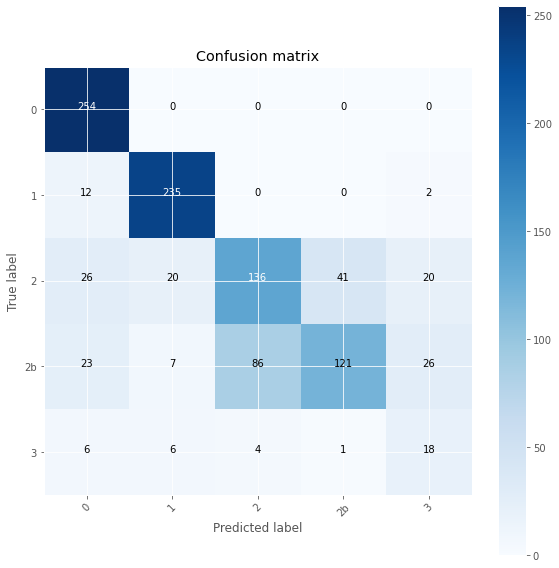

In [178]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, yhat_test, labels=['0','1', '2', '2b', '3'])
np.set_printoptions(precision=5)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=['0','1', '2', '2b', '3'], normalize= False,  title='Confusion matrix')


### Compare between Models

In [145]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [179]:
Algoritm = [model_KNN, model_Tree, model_SVM, model_LR]
length = range(4)
Accuracy_score = np.zeros(4)
F1_score = np.zeros(4)
LogLoss = np.zeros(4)

for i, n in zip(Algoritm,length):
    
    y = i.predict(X_test)
    Accuracy_score[n] = metrics.accuracy_score(Y_test, y)
    F1_score[n] = f1_score(Y_test, y, average = 'weighted')
    
    
y_LR_prob = model_LR.predict_proba(X_test)
LogLoss[0:3] = np.NaN
LogLoss[-1] = log_loss(Y_test, y_LR_prob)

In [180]:
accuracy_comparison = pd.DataFrame({
    "Algorithm": ['KNN', 'Decision Tree', 'Support Vector Machine', 'Logistic Regression'],
    "Accuracy-Score": Accuracy_score[::-1],
    "F1-Score": F1_score[::-1],
    "LogLoss":LogLoss})
accuracy_comparison

Algorithm  Accuracy-Score  F1-Score   LogLoss
0                     KNN        0.731801  0.721816       NaN
1           Decision Tree        0.818008  0.819644       NaN
2  Support Vector Machine        0.818966  0.820371       NaN
3     Logistic Regression        0.821839  0.819647  0.865351

The best model to predict severity with numerical features is **model_SVM**.

### Using Categorical Features

Now we can use the categorical features to predict the best model.

In [129]:
conda install -c glemaitre imbalanced-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [62]:
df_balanced.columns

Index(['X', 'Y', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR',
       'DATE'],
      dtype='object')

In [23]:
df_balanced.dtypes

X                float64
Y                float64
ADDRTYPE          object
LOCATION          object
SEVERITYCODE      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INJURIES           int64
JUNCTIONTYPE      object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
HITPARKEDCAR      object
DATE              object
dtype: object

In [87]:
df_balanced['DATE'] = pd.to_datetime(df_balanced['DATE']) 
df_balanced['DATE'] = df_balanced['DATE'].dt.day_name()

In [193]:
df_balanced.isnull().sum()

X                   0
Y                   0
ADDRTYPE            0
LOCATION            0
SEVERITYCODE        0
COLLISIONTYPE    1699
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
INJURIES            0
JUNCTIONTYPE        0
WEATHER          1699
ROADCOND         1699
LIGHTCOND        1699
HITPARKEDCAR        0
DATE                0
dtype: int64

We know that all 1699 rows with null data has severity code of 0. If we drop them, then group of label-0 will be size of 1. Since there's no way we can fullfil the data, let's train the model to predict label 1, 2, 2b, 3 only.

In [207]:
df_balanced2 = df_balanced[df_balanced['SEVERITYCODE'] != '0']
df_balanced2.SEVERITYCODE.value_counts()

1     1700
2     1700
2b    1654
3      200
Name: SEVERITYCODE, dtype: int64

In [116]:
df_balanced2.dtypes

X                float64
Y                float64
ADDRTYPE          object
LOCATION          object
SEVERITYCODE      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INJURIES           int64
JUNCTIONTYPE      object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
HITPARKEDCAR      object
DATE               int64
dtype: object

In [208]:
# set new data frame
df_balanced2 = df_balanced2[['COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'DATE', 'SEVERITYCODE']]
df_balanced2.shape

(5254, 7)

In [209]:
df_balanced2

COLLISIONTYPE                             JUNCTIONTYPE   WEATHER  \
128498    Right Turn                        Driveway Junction  Overcast   
146313    Parked Car  Mid-Block (not related to intersection)   Unknown   
3145           Other                        Driveway Junction     Clear   
187221    Parked Car   At Intersection (intersection related)     Clear   
98651      Sideswipe   At Intersection (intersection related)   Raining   
...              ...                                      ...       ...   
220114    Pedestrian   At Intersection (intersection related)     Clear   
220363         Other  Mid-Block (not related to intersection)  Overcast   
220426    Pedestrian  Mid-Block (not related to intersection)     Clear   
220594    Pedestrian   At Intersection (intersection related)   Raining   
220604         Other  Mid-Block (not related to intersection)     Clear   

       ROADCOND                LIGHTCOND       DATE SEVERITYCODE  
128498      Dry                 Daylight   Thursday            1  
146313  Unknown  Dark - Street Lights On     Monday            1  
3145        Dry                 Daylight   Saturday            1  
187221      Dry                 Daylight  Wednesday            1  
98651       Wet                     Dusk     Sunday            1  
...         ...                      ...        ...          ...  
220114      Dry  Dark - Street Lights On    Tuesday            3  
220363      Dry                 Daylight     Friday            3  
220426      Dry  Dark - Street Lights On  Wednesday            3  
220594      Dry  Dark - Street Lights On     Monday            3  
220604      Dry                 Daylight     Friday            3  

[5254 rows x 7 columns]

In [210]:
# covert strings to cooresponding integers
feature_code = []

for col in df_balanced2.iloc[:,:-1]:
    unique = df_balanced2[col].unique().tolist()
    feature_code.append(unique)
    df_balanced2[col].replace(to_replace=unique, value=range(len(unique)),inplace=True)

In [83]:
feature = []    
for i in feature_code:
    feature.append(len(i))    
feature

[10, 6, 11, 8, 8, 2851]

In [211]:
feature_code

[['Right Turn',
  'Parked Car',
  'Other',
  'Sideswipe',
  'Left Turn',
  'Rear Ended',
  'Angles',
  'Cycles',
  'Pedestrian',
  'Head On'],
 ['Driveway Junction',
  'Mid-Block (not related to intersection)',
  'At Intersection (intersection related)',
  'Mid-Block (but intersection related)',
  'At Intersection (but not related to intersection)',
  'Ramp Junction'],
 ['Overcast',
  'Unknown',
  'Clear',
  'Raining',
  'Sleet/Hail/Freezing Rain',
  'Other',
  'Snowing',
  'Fog/Smog/Smoke',
  'Blowing Sand/Dirt',
  'Severe Crosswind',
  'Partly Cloudy'],
 ['Dry',
  'Unknown',
  'Wet',
  'Snow/Slush',
  'Ice',
  'Sand/Mud/Dirt',
  'Standing Water',
  'Other'],
 ['Daylight',
  'Dark - Street Lights On',
  'Dusk',
  'Dark - No Street Lights',
  'Dawn',
  'Unknown',
  'Dark - Street Lights Off',
  'Other'],
 ['Thursday',
  'Monday',
  'Saturday',
  'Wednesday',
  'Sunday',
  'Friday',
  'Tuesday']]

In [212]:
df_balanced2

COLLISIONTYPE  JUNCTIONTYPE  WEATHER  ROADCOND  LIGHTCOND  DATE  \
128498              0             0        0         0          0     0   
146313              1             1        1         1          1     1   
3145                2             0        2         0          0     2   
187221              1             2        2         0          0     3   
98651               3             2        3         2          2     4   
...               ...           ...      ...       ...        ...   ...   
220114              8             2        2         0          1     6   
220363              2             1        0         0          0     5   
220426              8             1        2         0          1     3   
220594              8             2        3         0          1     1   
220604              2             1        2         0          0     5   

       SEVERITYCODE  
128498            1  
146313            1  
3145              1  
187221            1  
98651             1  
...             ...  
220114            3  
220363            3  
220426            3  
220594            3  
220604            3  

[5254 rows x 7 columns]

In [213]:
X2 = df_balanced2.drop(['SEVERITYCODE'], axis = 1)
Y2 = df_balanced2[['SEVERITYCODE']]
print(X2.shape, Y2.shape)

(5254, 6) (5254, 1)


In [214]:
from sklearn import preprocessing
X2= preprocessing.StandardScaler().fit(X2).transform(X2)

In [215]:
#Split dataset to train and test
from sklearn.model_selection import train_test_split

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.15, random_state=4)
print ('Train set:', X2_train.shape,  Y2_train.shape)
print ('Test set:', X2_test.shape,  Y2_test.shape)

Train set: (4465, 6) (4465, 1)
Test set: (789, 6) (789, 1)


In [102]:
# over-sampling minority group
import imblearn
from imblearn.over_sampling import SMOTE

OS = SMOTE(random_state=12, ratio = 1.0)
X2_train_res, Y2_train_res = OS.fit_sample(X2_train, Y2_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### KNN

In [33]:
# Import KNN libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [106]:
# Train the model with different Ks 

Ks = 20
mean_acc_train = np.zeros((Ks-1))
mean_acc_test = np.zeros((Ks-1))
for n in range(3,Ks):
    
    #Train Model and Predict  
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X2_train_res,Y2_train_res)
    yhat_train = KNN.predict(X2_train_res)
    yhat_test = KNN.predict(X2_test)
    mean_acc_train[n-1] = metrics.accuracy_score(Y2_train_res, yhat_train)
    mean_acc_test[n-1] = metrics.accuracy_score(Y2_test, yhat_test)

print(mean_acc_train) 
print(mean_acc_test)

[0.      0.      0.80077 0.76857 0.75326 0.74021 0.73586 0.71846 0.71133
 0.70419 0.69776 0.69323 0.68766 0.6774  0.67687 0.67009 0.67305 0.66643
 0.66591]
[0.      0.      0.59696 0.61343 0.60583 0.6071  0.6109  0.61724 0.62104
 0.61217 0.61217 0.62484 0.59442 0.60837 0.6109  0.61597 0.6109  0.61217
 0.60583]


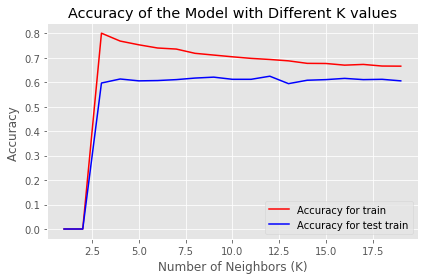

In [107]:
# Choose the best K

plt.plot(range(1,Ks),mean_acc_train,'r')
plt.plot(range(1,Ks),mean_acc_test,'b')

plt.title("Accuracy of the Model with Different K values")
plt.legend(('Accuracy for train', 'Accuracy for test train'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [108]:
print("The best accuracy was with", mean_acc_test.max(), "with k=", mean_acc_test.argmax()+1)

The best accuracy was with 0.6248415716096325 with k= 12


In [130]:
# Rebuild the model with the best K previously found
model2_KNN = KNeighborsClassifier(n_neighbors = 12).fit(X2_train_res,Y2_train_res)
yhat = model2_KNN.predict(X2_test)
metrics.accuracy_score(Y2_test, yhat)

0.6248415716096325

Confusion matrix, without normalization
[[226  22   3  16]
 [ 56 144  24  27]
 [ 40  46  95  57]
 [  5   4  11  13]]


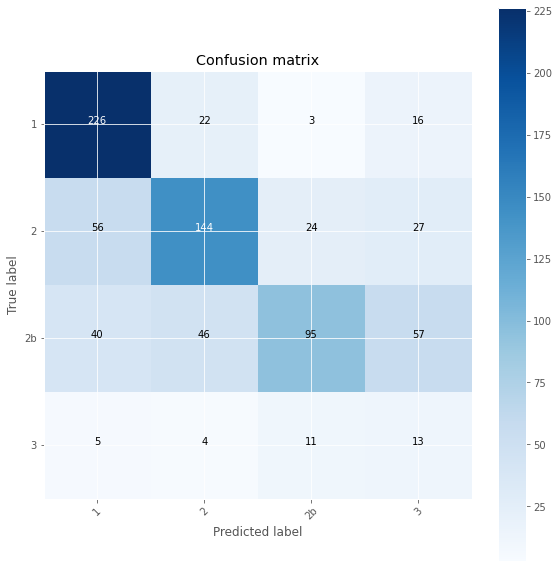

In [110]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf2_matrix = confusion_matrix(Y2_test, yhat_test, labels=['1', '2', '2b', '3'])
np.set_printoptions(precision=5)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf2_matrix, classes=['1', '2', '2b', '3'], normalize= False,  title='Confusion matrix')


### Decision Tree

In [40]:
# Import Decision Tree libraries
from sklearn.tree import DecisionTreeClassifier

In [111]:
# Build the model with different depths

Ks = 8
mean_acc_test = np.zeros((Ks-1))

for d in range(3,Ks):
    
    #Train Model and Predict  
    severityTree = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    severityTree.fit(X2_train_res, Y2_train_res)
    predTree = severityTree.predict(X2_test)
    mean_acc_test[d-1] = metrics.accuracy_score(Y2_test, predTree)

print(mean_acc_test)

[0.      0.      0.69328 0.70089 0.64892 0.65526 0.64766]


In [112]:
# Choose the best depth without overfitting
print("The best accuracy was with", mean_acc_test.max(), "with depth=", mean_acc_test.argmax()+1)

The best accuracy was with 0.7008871989860583 with depth= 4


In [113]:
# Rebuild the model
model2_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model2_Tree.fit(X2_train_res, Y2_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

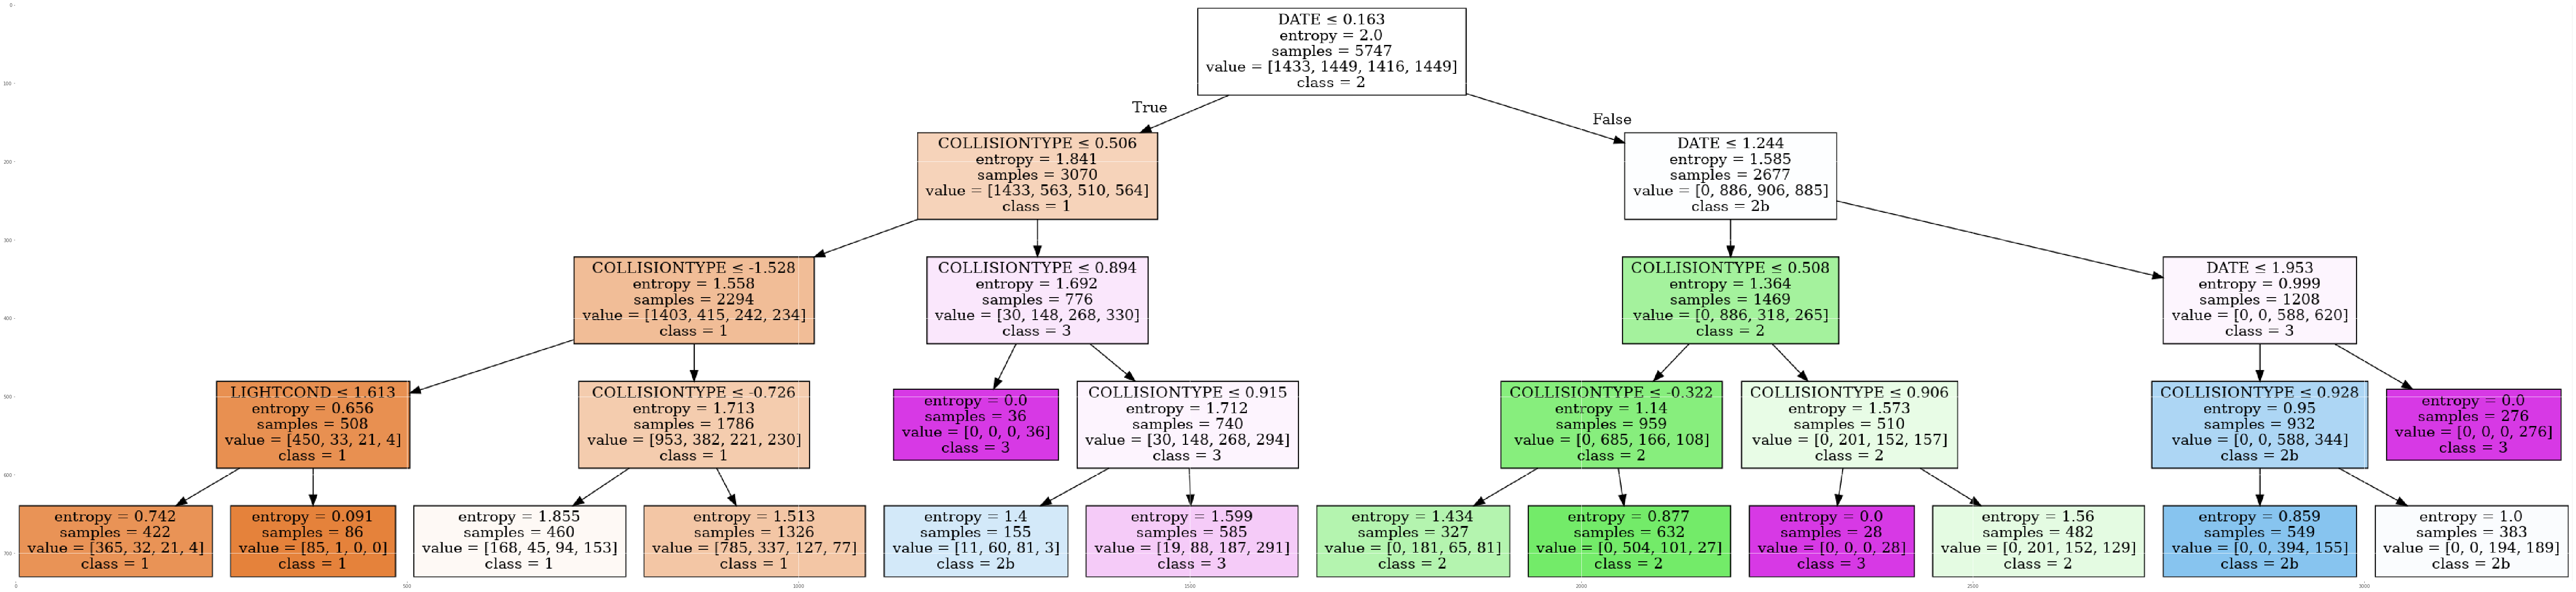

In [116]:
# Draw the model

from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
import matplotlib.image as mpimg

dot_data = StringIO()
filename = "severitytree2.png"
featureNames = df_balanced2.columns[0:6]
targetNames = df_balanced2["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(model2_Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(Y2_train_res), filled=True, special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 400))
plt.imshow(img,interpolation='nearest')

Confusion matrix, without normalization
[[263   0   0   4]
 [ 65 161  10  15]
 [ 47  46 115  30]
 [  5   5   9  14]]


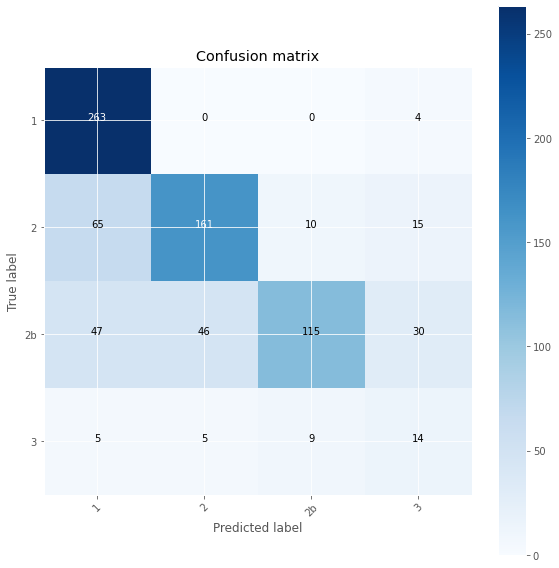

In [181]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
yhat_test = model2_Tree.predict(X2_test)
cnf2_matrix = confusion_matrix(Y2_test, yhat_test, labels=['1', '2', '2b', '3'])
np.set_printoptions(precision=5)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf2_matrix, classes=['1', '2', '2b', '3'], normalize= False,  title='Confusion matrix')


### Suporter Vector Machine

In [117]:
# Build the SVM model
from sklearn import svm

model2_SVM = svm.SVC(kernel='rbf')
model2_SVM.fit(X2_train_res, Y2_train_res)
yhat_test = model2_SVM.predict(X2_test)

Confusion matrix, without normalization
[[249  14   2   2]
 [ 56 146  29  20]
 [ 43  36 103  56]
 [  6   6   7  14]]


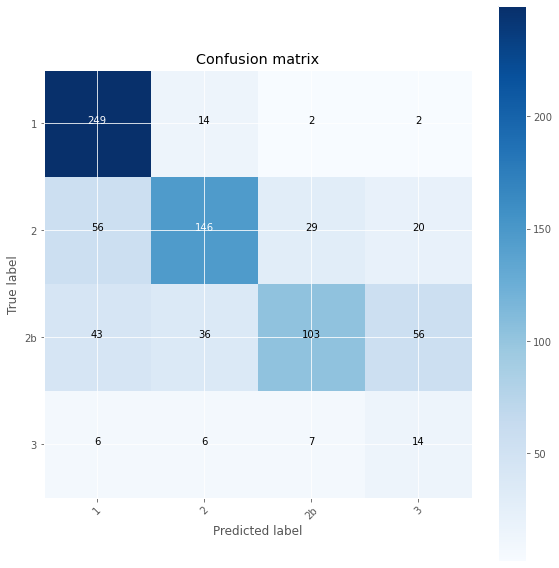

In [118]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf2_matrix = confusion_matrix(Y2_test, yhat_test, labels=['1', '2', '2b', '3'])
np.set_printoptions(precision=5)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf2_matrix, classes=['1', '2', '2b', '3'], normalize= False,  title='Confusion matrix')


### Logistic Regression

In [125]:
# Build the model for Logistic Regression
from sklearn.linear_model import LogisticRegression

model2_LR = LogisticRegression(C=0.01, solver='liblinear').fit(X2_train_res, Y2_train_res)
yhat_test = model2_LR.predict(X2_test)

Confusion matrix, without normalization
[[233  30   0   4]
 [ 61  53  37 100]
 [ 54  27  39 118]
 [  8   4   3  18]]


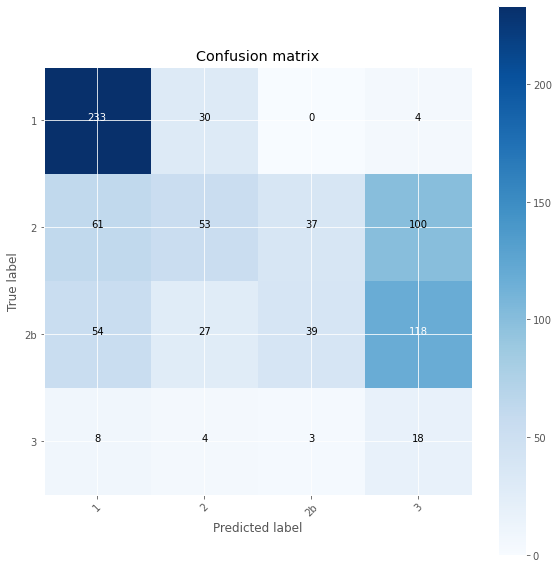

In [120]:
# Compute confusion matrix
cnf2_matrix = confusion_matrix(Y2_test, yhat_test, labels=['1', '2', '2b', '3'])
np.set_printoptions(precision=5)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf2_matrix, classes=['1', '2', '2b', '3'], normalize= False,  title='Confusion matrix')


### Compare between Models

In [52]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [147]:
Algoritm = [model2_KNN, model2_Tree, model2_SVM, model2_LR]
length = range(4)
Accuracy_score = np.zeros(4)
F1_score = np.zeros(4)
LogLoss = np.zeros(4)

for i, n in zip(Algoritm,length):
    
    yhat = i.predict(X2_test)
    Accuracy_score[n] = metrics.accuracy_score(Y2_test, yhat)
    F1_score[n] = f1_score(Y2_test, yhat, average = 'weighted')
    
    
y_LR_prob = model2_LR.predict_proba(X2_test)
LogLoss[0:3] = np.NaN
LogLoss[-1] = log_loss(Y2_test, y_LR_prob)

In [150]:
accuracy_comparison = pd.DataFrame({
    "Algorithm": ['KNN', 'Decision Tree', 'Support Vector Machine', 'Logistic Regression'],
    "Accuracy-Score": Accuracy_score,
    "F1-Score": F1_score,
    "LogLoss":LogLoss})
accuracy_comparison

Algorithm  Accuracy-Score  F1-Score   LogLoss
0                     KNN        0.624842  0.631821       NaN
1           Decision Tree        0.700887  0.695062       NaN
2  Support Vector Machine        0.648923  0.649762       NaN
3     Logistic Regression        0.434728  0.425248  1.130136

The best model to predict severity with catagorical features is **model2_Tree**. However, its accuracy is way lower than the models we trained with numberical features eariler. Therefore, using catagorocal features themselves is not a good prediction.

### Combine All Features

How about if we use all features to predict the model?

Oversampling will give us an error since only 1 sample available for code 0. Let'd try to randomly generate more code 0 data.

In [278]:
tmp = df_balanced.drop(['X', 'Y', 'ADDRTYPE', 'LOCATION'], axis = 1)

In [279]:
# covert strings to cooresponding integers
#feature_code = []

for col in tmp.iloc[:,[1, 7, 8, 9, 10, 11, 12]]:
    unique = tmp[col].unique().tolist()
    #feature_code.append(unique)
    tmp[col].replace(to_replace=unique, value=range(len(unique)),inplace=True)

In [281]:
tmp['SEVERITYCODE'].value_counts()

1     1700
2     1700
0     1700
2b    1654
3      200
Name: SEVERITYCODE, dtype: int64

In [282]:
df_balanced3 = tmp

In [283]:
df_balanced3

SEVERITYCODE  COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  \
199896            0              0            2         0            0   
192844            0              0            0         0            0   
156181            0              0            0         0            0   
210400            0              0            0         0            0   
218485            0              0            0         0            0   
...             ...            ...          ...       ...          ...   
220114            3              9            2         0            0   
220363            3              4            1         0            0   
220426            3              9            3         1            0   
220594            3              9            2         1            0   
220604            3              4            5         4            0   

        VEHCOUNT  INJURIES  JUNCTIONTYPE  WEATHER  ROADCOND  LIGHTCOND  \
199896         0         0             0        0         0          0   
192844         0         0             1        0         0          0   
156181         0         0             0        0         0          0   
210400         0         0             1        0         0          0   
218485         0         0             0        0         0          0   
...          ...       ...           ...      ...       ...        ...   
220114         0         0             1        4         2          2   
220363         1         0             0        2         2          1   
220426         1         0             0        4         2          2   
220594         1         0             1        1         2          2   
220604         1         2             0        4         2          1   

        HITPARKEDCAR  DATE  
199896             0     0  
192844             1     1  
156181             1     1  
210400             1     2  
218485             0     1  
...              ...   ...  
220114             1     6  
220363             1     1  
220426             1     3  
220594             1     0  
220604             1     1  

[6954 rows x 13 columns]

In [284]:
X3 = df_balanced3.drop(['SEVERITYCODE'], axis = 1)
Y3 = df_balanced3[['SEVERITYCODE']]
print(X3.shape, Y3.shape)

(6954, 12) (6954, 1)


In [285]:
from sklearn import preprocessing
X3= preprocessing.StandardScaler().fit(X3).transform(X3)

In [286]:
#Split dataset to train and test
from sklearn.model_selection import train_test_split

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.15, random_state=4)
print ('Train set:', X3_train.shape,  Y3_train.shape)
print ('Test set:', X3_test.shape,  Y3_test.shape)

Train set: (5910, 12) (5910, 1)
Test set: (1044, 12) (1044, 1)


In [287]:
# over-sampling minority group
import imblearn
from imblearn.over_sampling import SMOTE

OS = SMOTE(random_state=12, ratio = 1.0)
X3_train_res, Y3_train_res = OS.fit_sample(X3_train, Y3_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### KNN

In [33]:
# Import KNN libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [288]:
# Train the model with different Ks 

Ks = 20
mean_acc_train = np.zeros((Ks-1))
mean_acc_test = np.zeros((Ks-1))
for n in range(3,Ks):
    
    #Train Model and Predict  
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X3_train_res,Y3_train_res)
    yhat_train = KNN.predict(X3_train_res)
    yhat_test = KNN.predict(X3_test)
    mean_acc_train[n-1] = metrics.accuracy_score(Y3_train_res, yhat_train)
    mean_acc_test[n-1] = metrics.accuracy_score(Y3_test, yhat_test)

print(mean_acc_train) 
print(mean_acc_test)

[0.      0.      0.87198 0.86129 0.85657 0.84449 0.8406  0.83477 0.83435
 0.8288  0.82949 0.82616 0.82186 0.81936 0.81852 0.81616 0.8145  0.81158
 0.81033]
[0.      0.      0.73276 0.74138 0.74808 0.74042 0.74425 0.74234 0.74713
 0.74234 0.74425 0.74138 0.74521 0.73563 0.74713 0.7433  0.75383 0.75096
 0.75096]


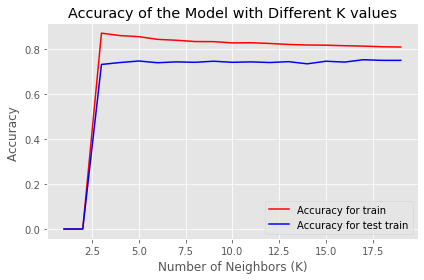

In [289]:
# Choose the best K

plt.plot(range(1,Ks),mean_acc_train,'r')
plt.plot(range(1,Ks),mean_acc_test,'b')

plt.title("Accuracy of the Model with Different K values")
plt.legend(('Accuracy for train', 'Accuracy for test train'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [290]:
print("The best accuracy was with", mean_acc_test.max(), "with k=", mean_acc_test.argmax()+1)

The best accuracy was with 0.7538314176245211 with k= 17


In [293]:
# Rebuild the model with the best K previously found
model3_KNN = KNeighborsClassifier(n_neighbors = 17).fit(X3_train_res,Y3_train_res)
yhat = model3_KNN.predict(X3_test)
metrics.accuracy_score(Y3_test, yhat)

0.7538314176245211

Confusion matrix, without normalization
[[254   0   0   0   0]
 [  0 236   2   1  10]
 [  0  18 146  64  15]
 [  0   9  90 132  32]
 [  0   8   6   2  19]]


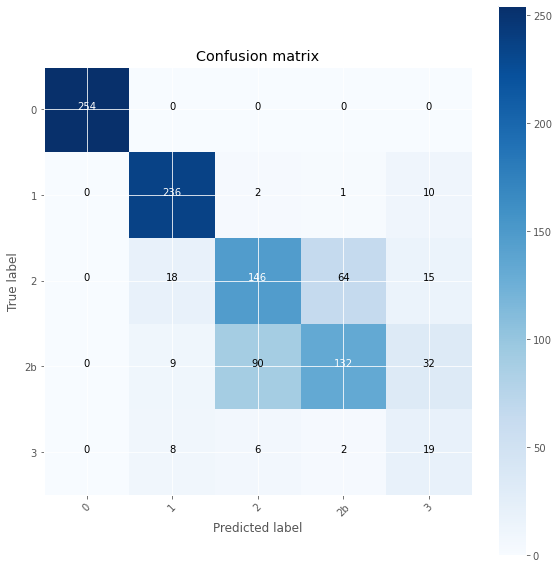

In [294]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf3_matrix = confusion_matrix(Y3_test, yhat, labels=['0', '1', '2', '2b', '3'])
np.set_printoptions(precision=5)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf3_matrix, classes=['0', '1', '2', '2b', '3'], normalize= False,  title='Confusion matrix')


### Decision Tree

In [40]:
# Import Decision Tree libraries
from sklearn.tree import DecisionTreeClassifier

In [295]:
# Build the model with different depths

Ks = 15
mean_acc_test = np.zeros((Ks-1))

for d in range(3,Ks):
    
    #Train Model and Predict  
    severityTree = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    severityTree.fit(X3_train_res, Y3_train_res)
    predTree = severityTree.predict(X3_test)
    mean_acc_test[d-1] = metrics.accuracy_score(Y3_test, predTree)

print(mean_acc_test)

[0.      0.      0.80939 0.81034 0.81034 0.8113  0.80939 0.80077 0.80077
 0.78831 0.7931  0.78544 0.7864  0.78065]


In [296]:
# Choose the best depth without overfitting
print("The best accuracy was with", mean_acc_test.max(), "with depth=", mean_acc_test.argmax()+1)

The best accuracy was with 0.8113026819923371 with depth= 6


In [297]:
# Rebuild the model
model3_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
model3_Tree.fit(X3_train_res, Y3_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

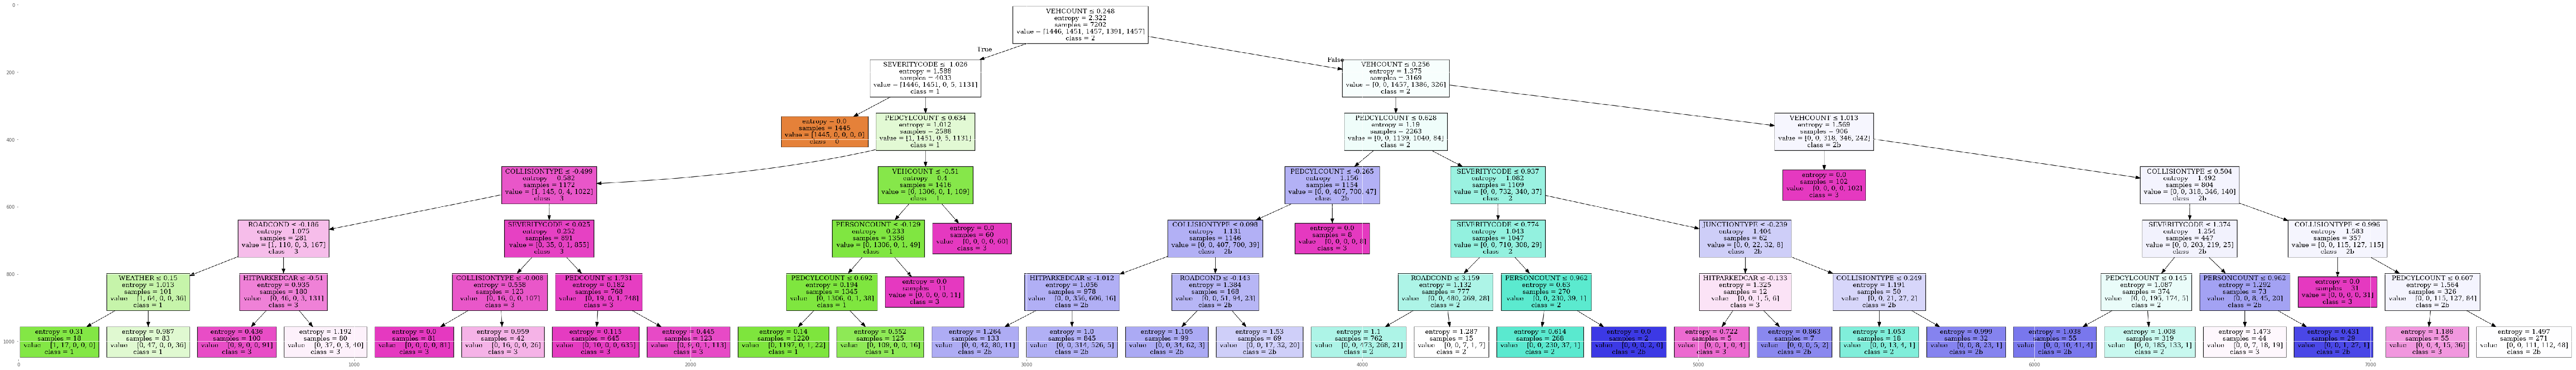

In [298]:
# Draw the model

from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
import matplotlib.image as mpimg

dot_data = StringIO()
filename = "severitytree3.png"
featureNames = df_balanced3.columns[0:12]
targetNames = df_balanced3["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(model3_Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(Y3_train_res), filled=True, special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 400))
plt.imshow(img,interpolation='nearest')

Confusion matrix, without normalization
[[254   0   0   0   0]
 [  0 240   0   0   9]
 [  0   0 152  91   0]
 [  0   0  75 178  10]
 [  0   5   4   3  23]]


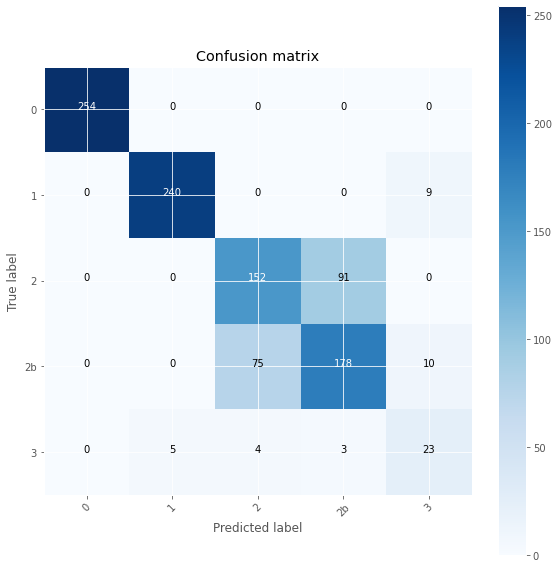

In [299]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
yhat_test = model3_Tree.predict(X3_test)
cnf3_matrix = confusion_matrix(Y3_test, yhat_test, labels=['0', '1', '2', '2b', '3'])
np.set_printoptions(precision=5)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf3_matrix, classes=['0', '1', '2', '2b', '3'], normalize= False,  title='Confusion matrix')


### Suporter Vector Machine

In [301]:
# Build the SVM model
from sklearn import svm

model3_SVM = svm.SVC(kernel='rbf')
model3_SVM.fit(X3_train_res, Y3_train_res)
yhat_test = model3_SVM.predict(X3_test)

Confusion matrix, without normalization
[[254   0   0   0   0]
 [  0 236   0   0  13]
 [  0   0 166  73   4]
 [  0   0  90 169   4]
 [  0   4   5   2  24]]


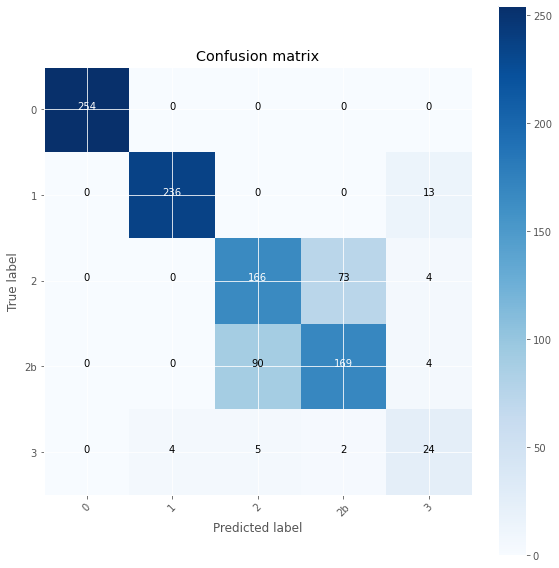

In [302]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf3_matrix = confusion_matrix(Y3_test, yhat_test, labels=['0', '1', '2', '2b', '3'])
np.set_printoptions(precision=5)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf3_matrix, classes=['0', '1', '2', '2b', '3'], normalize= False,  title='Confusion matrix')


### Logistic Regression

In [303]:
# Build the model for Logistic Regression
from sklearn.linear_model import LogisticRegression

model3_LR = LogisticRegression(C=0.01, solver='liblinear').fit(X3_train_res, Y3_train_res)
yhat_test = model3_LR.predict(X3_test)

Confusion matrix, without normalization
[[254   0   0   0   0]
 [  1 245   0   2   1]
 [  7  31 138  36  31]
 [  5   8  94  88  68]
 [  0  10   5   3  17]]


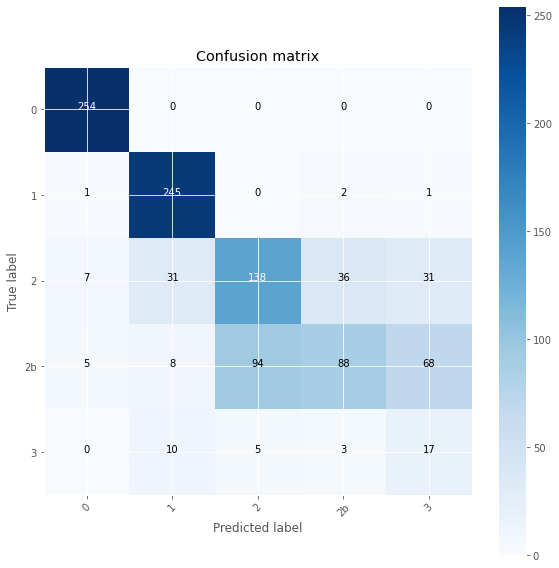

In [305]:
# Compute confusion matrix
cnf3_matrix = confusion_matrix(Y3_test, yhat_test, labels=['0', '1', '2', '2b', '3'])
np.set_printoptions(precision=5)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf3_matrix, classes=['0', '1', '2', '2b', '3'], normalize= False,  title='Confusion matrix')


### Compare between Models

In [52]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [306]:
Algoritm = [model3_KNN, model3_Tree, model3_SVM, model3_LR]
length = range(4)
Accuracy_score = np.zeros(4)
F1_score = np.zeros(4)
LogLoss = np.zeros(4)

for i, n in zip(Algoritm,length):
    
    yhat = i.predict(X3_test)
    Accuracy_score[n] = metrics.accuracy_score(Y3_test, yhat)
    F1_score[n] = f1_score(Y3_test, yhat, average = 'weighted')
    
    
y_LR_prob = model3_LR.predict_proba(X3_test)
LogLoss[0:3] = np.NaN
LogLoss[-1] = log_loss(Y3_test, y_LR_prob)

In [307]:
accuracy_comparison = pd.DataFrame({
    "Algorithm": ['KNN', 'Decision Tree', 'Support Vector Machine', 'Logistic Regression'],
    "Accuracy-Score": Accuracy_score,
    "F1-Score": F1_score,
    "LogLoss":LogLoss})
accuracy_comparison

Algorithm  Accuracy-Score  F1-Score   LogLoss
0                     KNN        0.753831  0.754773       NaN
1           Decision Tree        0.811303  0.811979       NaN
2  Support Vector Machine        0.813218  0.814893       NaN
3     Logistic Regression        0.710728  0.706891  0.810925

The best model to predict severity with catagorical features is **model3_SVM**. 

## <font color = 'red'>Conclusion</font>

In [180]:
accuracy_comparison = pd.DataFrame({
    "Algorithm": ['KNN', 'Decision Tree', 'Support Vector Machine', 'Logistic Regression'],
    "Accuracy-Score": Accuracy_score[::-1],
    "F1-Score": F1_score[::-1],
    "LogLoss":LogLoss})
accuracy_comparison

Algorithm  Accuracy-Score  F1-Score   LogLoss
0                     KNN        0.731801  0.721816       NaN
1           Decision Tree        0.818008  0.819644       NaN
2  Support Vector Machine        0.818966  0.820371       NaN
3     Logistic Regression        0.821839  0.819647  0.865351

Compare with model trained without catagorical features, **model_SVM** gives the highest accuracy. The prediction doesn't need catagorical features. 